In [940]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv("/Users/lm/Desktop/Projects/NLP/Womens Clothing E-Commerce Reviews.csv")

df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [976]:
df.info()

# Check for missing values

missing_values = df.isnull().sum()
missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [942]:
# Removing rows with missing values in specified columns

data_cleaned = df.dropna(subset=['Review Text', 'Division Name', 'Department Name', 'Class Name'])

original_shape = df.shape[0]
cleaned_shape = data_cleaned.shape[0]

original_shape, cleaned_shape


(23486, 22628)

We have removed rows with blank Review Text data as this project will later focus on predictive modelling based on text reviews. We have removed rows with blank Division Name, Department Name, Class Name data as we will be doing EDA on these fields.

# Visual Exploratory Data Analysis (EDA)

In [943]:
numerical_descriptive = data_cleaned[["Age", "Rating", "Recommended IND", "Positive Feedback Count"]].describe()

numerical_descriptive


,Age,Rating,Recommended IND,Positive Feedback Count
count,22628.000000,22628.000000,22628.000000,22628.000000
mean,43.282880,4.183092,0.818764,2.631784
std,12.328176,1.115911,0.385222,5.787520
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


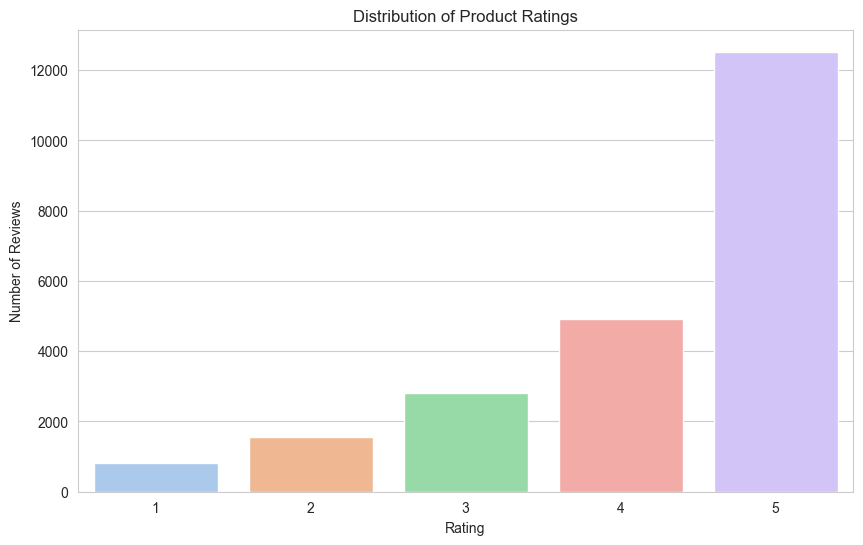

In [944]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Rating', palette='pastel')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


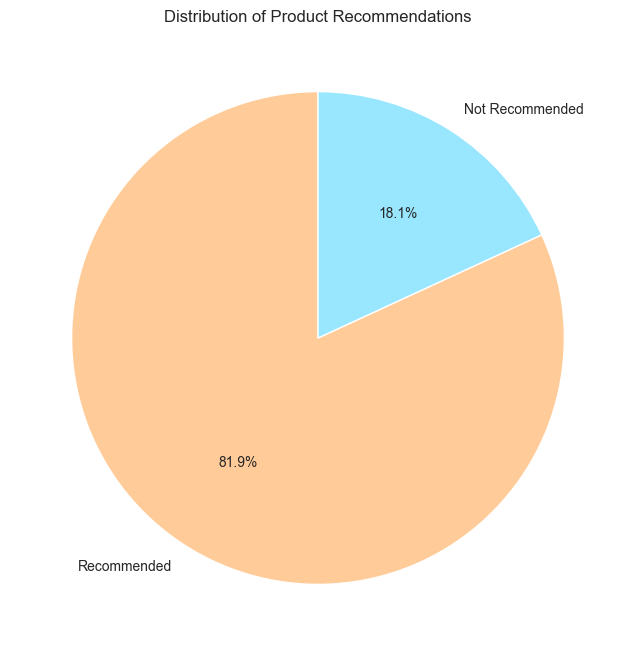

In [978]:
sizes = data_cleaned['Recommended IND'].value_counts()
labels = ['Recommended', 'Not Recommended']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ffcc99', '#99e6ff'])
plt.title('Distribution of Product Recommendations')
plt.show()



This dataset consists of mainly high Product Ratings and Recommended Products.

Multivariate Analysis

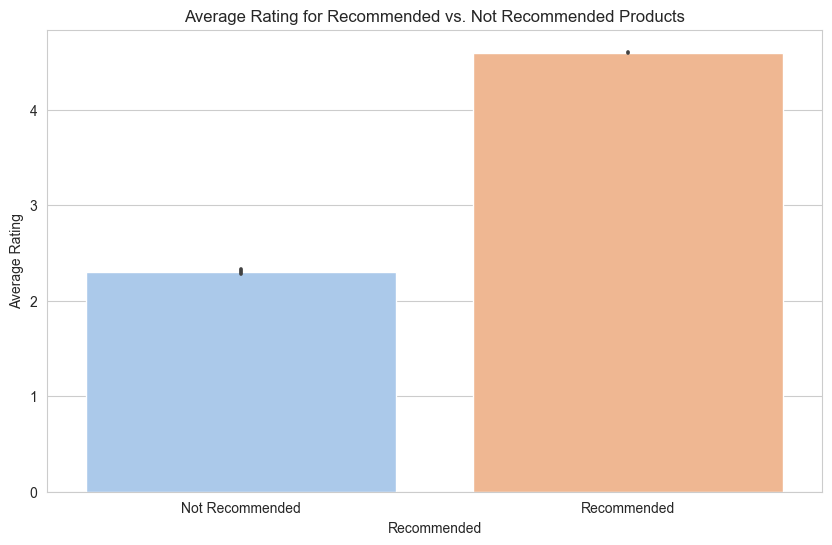

In [946]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_cleaned, x='Recommended IND', y='Rating', palette='pastel')
plt.title('Average Rating for Recommended vs. Not Recommended Products')
plt.xlabel('Recommended')
plt.ylabel('Average Rating')
plt.xticks(ticks=[0,1], labels=['Not Recommended', 'Recommended'])
plt.show()


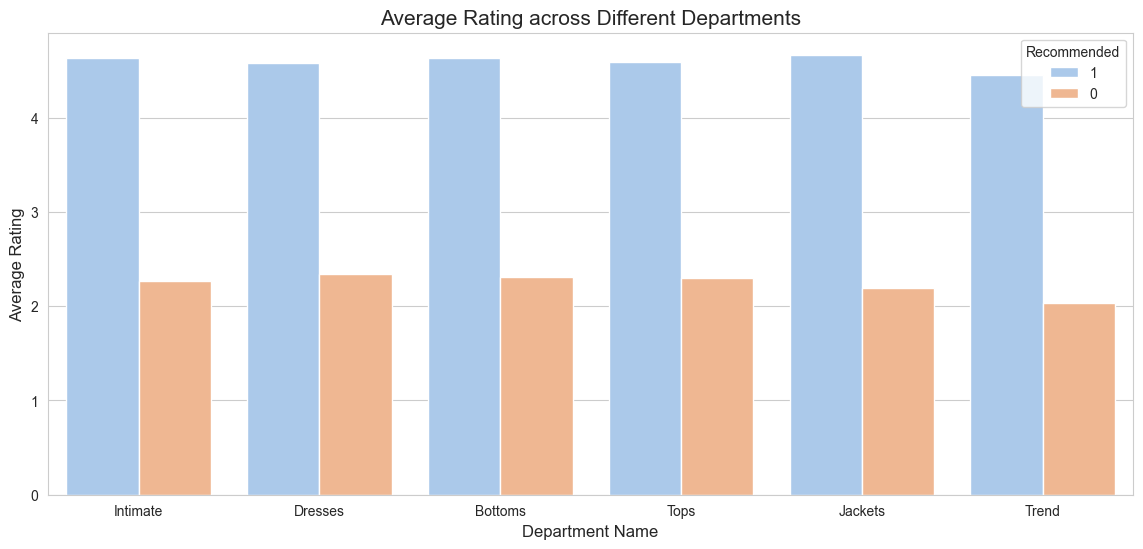

In [947]:
plt.figure(figsize=(14, 6))
sns.barplot(data=data_cleaned, x='Department Name', y='Rating', hue=data_cleaned['Recommended IND'].astype(str), palette='pastel', ci=None)
plt.title('Average Rating across Different Departments')
plt.xlabel('Department Name')
plt.ylabel('Average Rating')
plt.legend(title='Recommended')
plt.show()


# Data Preprocessing

Text Cleaning

In [948]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [949]:
import re

# Function to clean the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove punctuation and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    
    # Remove single characters left as a result of removing punctuation and numbers
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # Remove stopwords
    text_tokens = text.split()
    text_tokens_filtered = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    
    return ' '.join(text_tokens_filtered)


data_cleaned['Cleaned Review Text'] = data_cleaned['Review Text'].apply(clean_text)

data_cleaned[['Review Text', 'Cleaned Review Text']].head()


,Review Text,Cleaned Review Text
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened find store gla...
2,I had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...


Tokenization

In [950]:
data_cleaned['Tokenized Review'] = data_cleaned['Cleaned Review Text'].apply(lambda x: x.split())

data_cleaned[['Cleaned Review Text', 'Tokenized Review']].head()


,Cleaned Review Text,Tokenized Review
0,absolutely wonderful silky sexy comfortable,"[absolutely, wonderful, silky, sexy, comfortable]"
1,love dress sooo pretty happened find store gla...,"[love, dress, sooo, pretty, happened, find, st..."
2,high hopes dress really wanted work initially ...,"[high, hopes, dress, really, wanted, work, ini..."
3,love love love jumpsuit fun flirty fabulous ev...,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,shirt flattering due adjustable front tie perf...,"[shirt, flattering, due, adjustable, front, ti..."


Lemmatization

In [951]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of words
def lemmatize_words(word_list):
    return [lemmatizer.lemmatize(word) for word in word_list]

data_cleaned['Lemmatized Review'] = data_cleaned['Tokenized Review'].apply(lemmatize_words)

data_cleaned[['Tokenized Review', 'Lemmatized Review']].head()


,Tokenized Review,Lemmatized Review
0,"[absolutely, wonderful, silky, sexy, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]"
1,"[love, dress, sooo, pretty, happened, find, st...","[love, dress, sooo, pretty, happened, find, st..."
2,"[high, hopes, dress, really, wanted, work, ini...","[high, hope, dress, really, wanted, work, init..."
3,"[love, love, love, jumpsuit, fun, flirty, fabu...","[love, love, love, jumpsuit, fun, flirty, fabu..."
4,"[shirt, flattering, due, adjustable, front, ti...","[shirt, flattering, due, adjustable, front, ti..."


Both the Tokenizer and Lemmatizer methods offer good results but lemmatizer uses some words in their root/base form e.g. initially as initial. This adds additional consistentcy for text data when it comes to our remaining EDA steps e.g. word counts.

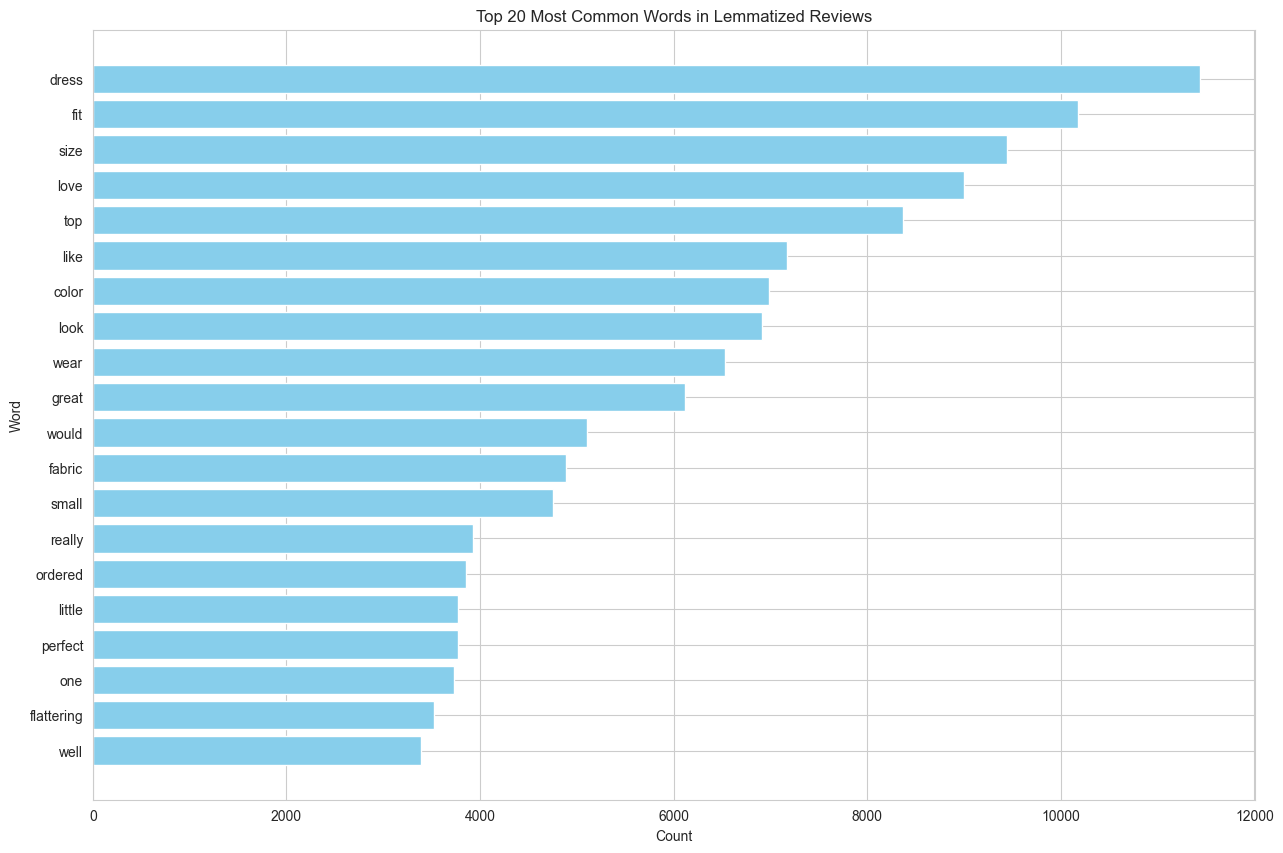

In [952]:
from collections import Counter
import matplotlib.pyplot as plt

all_words = [word for tokens in data_cleaned['Lemmatized Review'] for word in tokens]

word_freq = Counter(all_words)

common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(15, 10))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 20 Most Common Words in Lemmatized Reviews')
plt.gca().invert_yaxis()
plt.show()


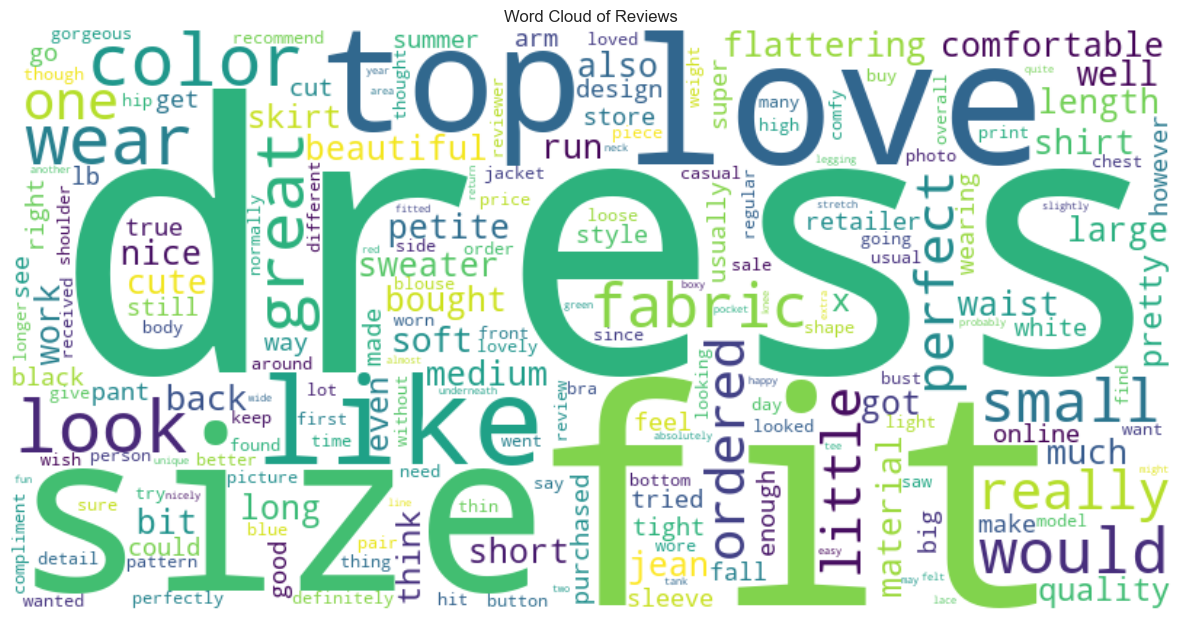

In [953]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


# Sentiment Analysis

To preserve the semantic meaning of the text, I will do this using the Cleaned Review Data.

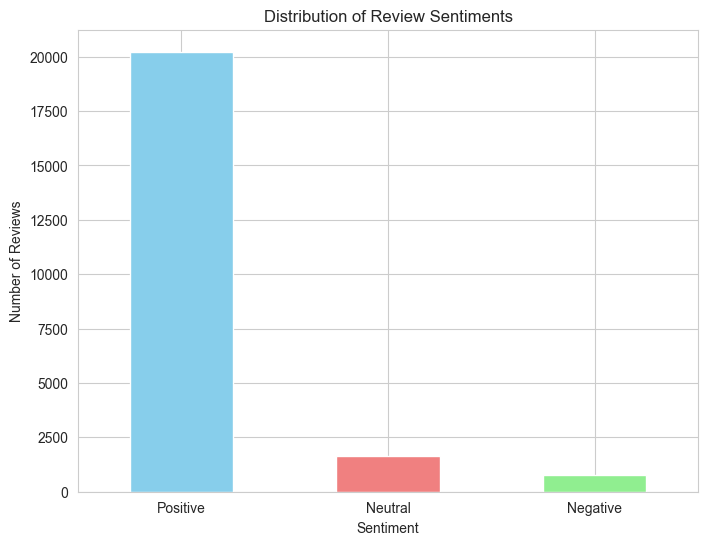

In [954]:
from textblob import TextBlob

# Calculate polarity of each review
data_cleaned['Polarity'] = data_cleaned['Cleaned Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize reviews based on polarity
data_cleaned['Sentiment'] = data_cleaned['Polarity'].apply(lambda x: 'Positive' if x > 0.05 else ('Neutral' if -0.05 <= x <= 0.05 else 'Negative'))

plt.figure(figsize=(8, 6))
data_cleaned['Sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


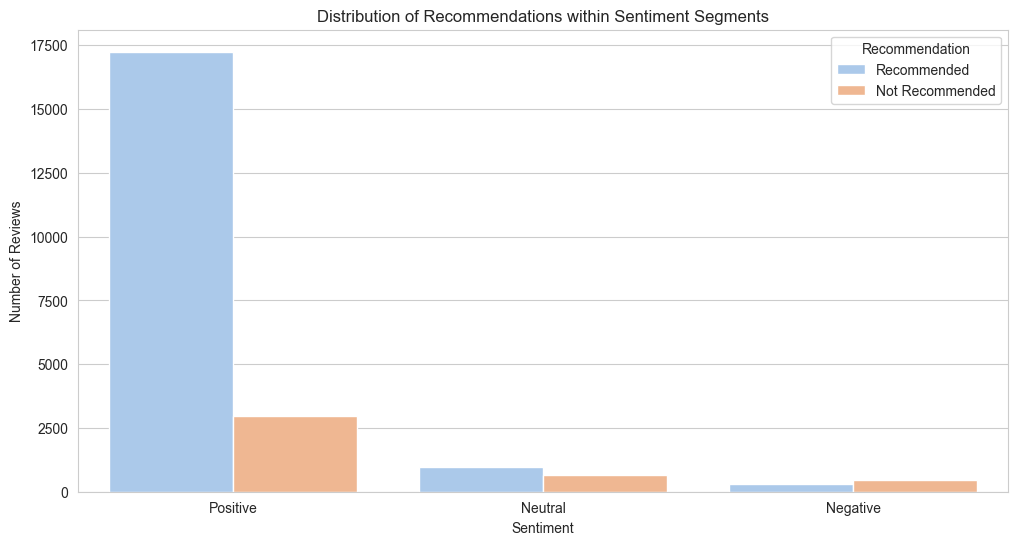

In [955]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='Sentiment', hue=data_cleaned['Recommended IND'].astype(str), palette='pastel')
plt.title('Distribution of Recommendations within Sentiment Segments')
plt.ylabel('Number of Reviews')
plt.legend(title='Recommendation', loc='upper right', labels=['Recommended', 'Not Recommended'])
plt.show()


As expected, we see that customers who have left reviews with Positive Sentiment are more likely to Recommend the product. The opposite is seen for products with Negative Sentiment reviews (although the amount of reviews which fall into this category are much smaller).

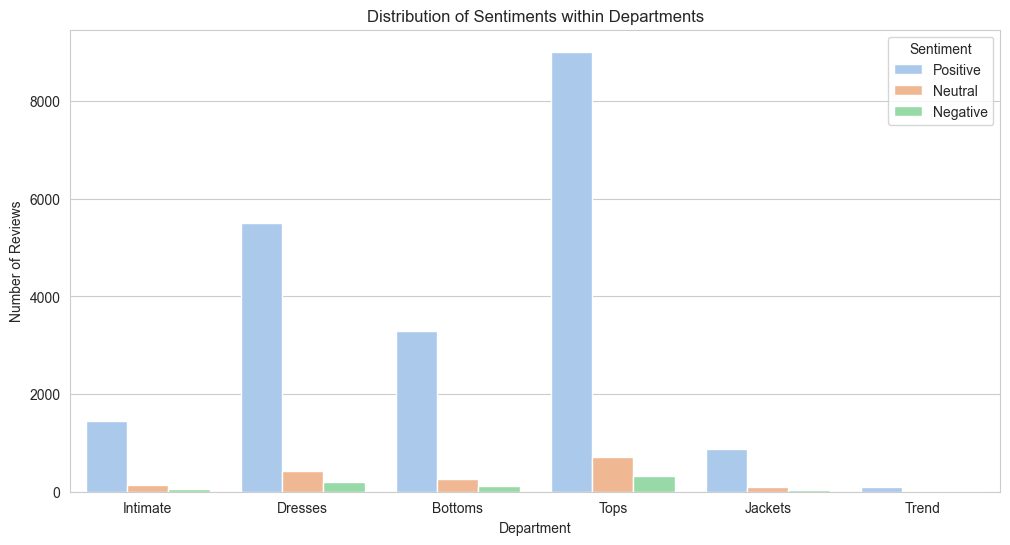

In [956]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='Department Name', hue='Sentiment', palette='pastel')
plt.title('Distribution of Sentiments within Departments')
plt.ylabel('Number of Reviews')
plt.xlabel('Department')
plt.legend(title='Sentiment', loc='upper right')
plt.show()


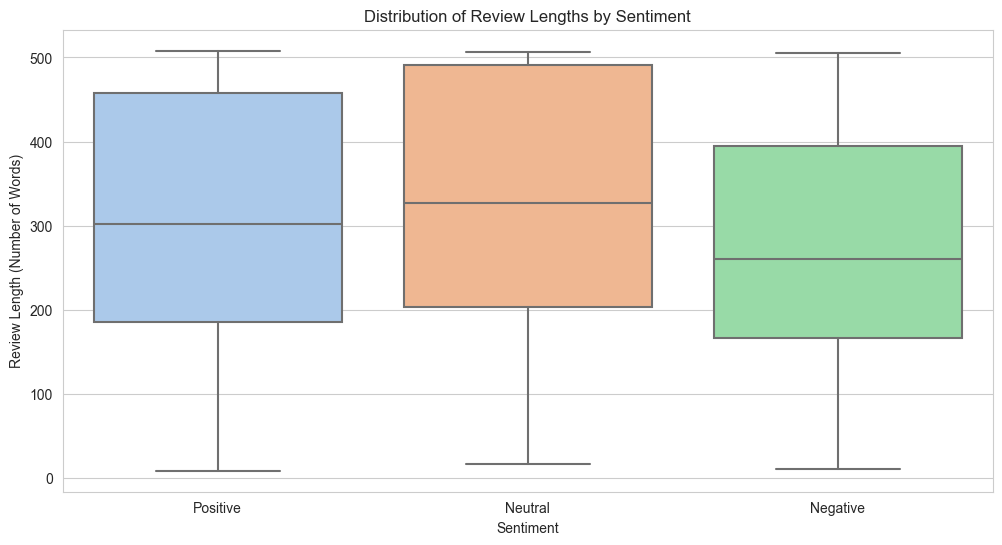

In [957]:
data_cleaned['Review Length'] = data_cleaned['Review Text'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned, x='Sentiment', y='Review Length', palette='pastel')
plt.title('Distribution of Review Lengths by Sentiment')
plt.ylabel('Review Length (Number of Words)')
plt.xlabel('Sentiment')
plt.show()


# Clustering

In [958]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Converting the lemmatized reviews into a single string
data_cleaned['Lemmatized Review Text'] = data_cleaned['Lemmatized Review'].apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=5000)

tfidf_matrix = tfidf_vectorizer.fit_transform(data_cleaned['Lemmatized Review Text'])

tfidf_matrix.shape


(22628, 5000)

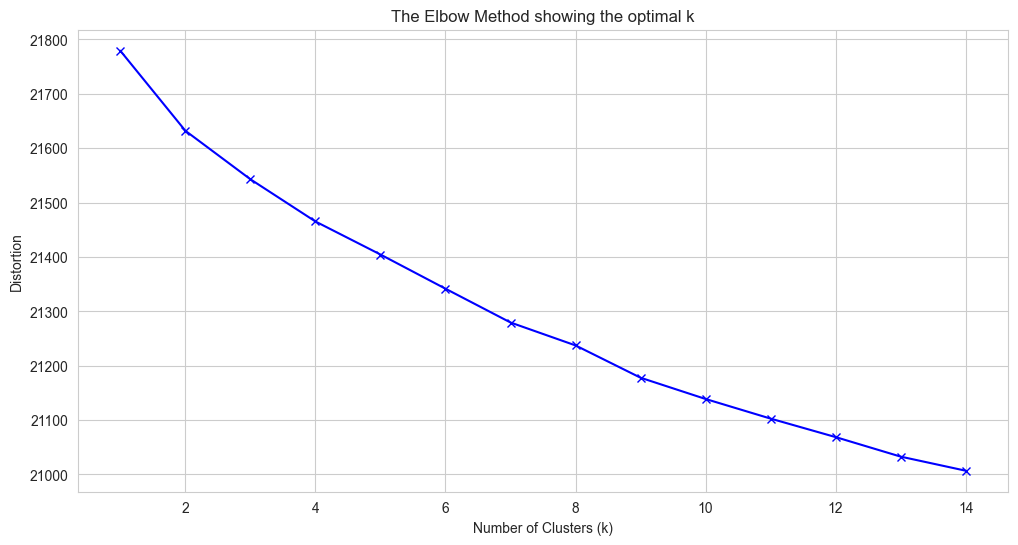

In [959]:
# Elbow Method

from sklearn.cluster import KMeans

distortions = []
K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(tfidf_matrix)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [960]:
kmeans = KMeans(n_clusters=11, random_state=42)

# Fitting the model to the TF-IDF matrix
data_cleaned['Cluster'] = kmeans.fit_predict(tfidf_matrix)

cluster_distribution = data_cleaned['Cluster'].value_counts().sort_index()
cluster_distribution


Cluster
0     2397
1      689
2     6799
3     1279
4     1147
5     2029
6     1272
7     3702
8     1011
9      899
10    1404
Name: count, dtype: int64

In [961]:
# Getting the centroids of the clusters
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Getting the terms from the TF-IDF vectorizer
terms = tfidf_vectorizer.get_feature_names_out()

top_terms_per_cluster = {}

n_terms = 10

for i in range(11):
    top_terms = [terms[ind] for ind in order_centroids[i, :n_terms]]
    top_terms_per_cluster[i] = top_terms

top_terms_per_cluster


{0: ['top',
  'love',
  'color',
  'fit',
  'like',
  'look',
  'great',
  'wear',
  'cute',
  'fabric'],
 1: ['jacket',
  'love',
  'great',
  'wear',
  'look',
  'fit',
  'color',
  'like',
  'size',
  'perfect'],
 2: ['color',
  'love',
  'fit',
  'like',
  'look',
  'great',
  'fabric',
  'soft',
  'would',
  'wear'],
 3: ['shirt',
  'love',
  'great',
  'fit',
  'cute',
  'look',
  'like',
  'color',
  'wear',
  'soft'],
 4: ['jean',
  'great',
  'skinny',
  'love',
  'fit',
  'look',
  'pair',
  'wear',
  'perfect',
  'legging'],
 5: ['size',
  'fit',
  'true',
  'ordered',
  'dress',
  'run',
  'love',
  'would',
  'color',
  'wear'],
 6: ['sweater',
  'love',
  'color',
  'soft',
  'look',
  'great',
  'like',
  'fit',
  'wear',
  'sleeve'],
 7: ['dress',
  'love',
  'fit',
  'wear',
  'like',
  'great',
  'flattering',
  'look',
  'beautiful',
  'perfect'],
 8: ['pant',
  'love',
  'great',
  'fit',
  'pair',
  'comfortable',
  'size',
  'color',
  'wear',
  'like'],
 9: ['ski

In [962]:
# Cluster Analysis Example

# Reviews
print(data_cleaned[data_cleaned['Cluster'] == 0]['Lemmatized Review'].head(5))

# Average Rating
avg_rating_0 = data_cleaned[data_cleaned['Cluster'] == 0]['Rating'].mean()
print(f"Average Rating for Cluster 0: {avg_rating_0:.2f}")

# Distribution of Recommendations
recommendation_counts_0 = data_cleaned[data_cleaned['Cluster'] == 0]['Recommended IND'].value_counts()
print(recommendation_counts_0)


46    [love, top, wear, time, problem, tell, wear, t...
49    [really, cute, top, embroidery, collar, bib, t...
54    [nice, top, armhole, bit, oversized, older, wo...
64              [loved, top, really, happy, find, sale]
66    [received, mail, tried, smitten, usually, l, s...
Name: Lemmatized Review, dtype: object
Average Rating for Cluster 0: 4.10
Recommended IND
1    1891
0     506
Name: count, dtype: int64


This is an example of how we can do cluster analysis to group customers and identify patterns within them. This is useful for product insights and tailored marketing. However, for the purpose of this project I will now move onto predective modelling.

# Predictive Modelling

In [979]:
# To ensure reproducability of results

import tensorflow as tf
import numpy as np
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [964]:
from sklearn.model_selection import train_test_split

X = data_cleaned['Cleaned Review Text']
y = data_cleaned['Recommended IND']

In [965]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, GlobalAveragePooling1D, Dense

# Train Test Validation Split
x, X_test, y, y_test = train_test_split(X, y, test_size=0.20, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=13)

In [966]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_tokens = 10000
max_length = 100   

vectorizer = TextVectorization(max_tokens=max_tokens, output_sequence_length=max_length)

vectorizer.adapt(X_train.values)


Tokenizer

In [967]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

Tokenized_train = tokenizer.texts_to_sequences(X_train)
Tokenized_val = tokenizer.texts_to_sequences(X_val)

print('Non-tokenized Version: ', X_train.iloc[0])
print('Tokenized Version: ', tokenizer.texts_to_sequences([X_train.iloc[0]]))
print('--'*20)
print('Non-tokenized Version: ', X_train.iloc[80])
print('Tokenized Version: ', tokenizer.texts_to_sequences([X_train.iloc[80]]))

Non-tokenized Version:  shirt different styles although expect last forever thus far wash really well given thin light weight love simple cut good look dressed hard find comfy tees one fits bill wish sold solid print colors like white black would
Tokenized Version:  [[29, 154, 824, 304, 579, 353, 1535, 1742, 468, 275, 14, 21, 770, 129, 115, 147, 3, 418, 66, 56, 15, 215, 350, 148, 167, 901, 19, 31, 1155, 150, 332, 730, 149, 41, 7, 83, 69, 10]]
----------------------------------------
Non-tokenized Version:  shirt beautiful coloring material soft thought would hoping would super soft material maybe washing would help want chance returned
Tokenized Version:  [[29, 26, 1253, 32, 22, 126, 10, 362, 10, 70, 22, 32, 224, 583, 10, 743, 132, 674, 268]]


Padding

In [968]:
maxlen = 50
Padded_train = pad_sequences(Tokenized_train, maxlen=maxlen, padding='pre')
Padded_val = pad_sequences(Tokenized_val, maxlen=maxlen, padding='pre')

Model Building

In [969]:
model = Sequential()
model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

Compiling and Training

In [970]:
opt = tf.optimizers.Adam(lr=0.55e-3)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=5, restore_best_weights=True)
epochs = 100
hist = model.fit(Padded_train, y_train, epochs=epochs, validation_data=(Padded_val, y_val), callbacks=[early_stopping], batch_size=32)

Epoch 1/100
425/425 [==============================] - 1s 1ms/step - loss: 0.5219 - accuracy: 0.8188 - val_loss: 0.4448 - val_accuracy: 0.8239
Epoch 2/100
425/425 [==============================] - 1s 1ms/step - loss: 0.4423 - accuracy: 0.8201 - val_loss: 0.4141 - val_accuracy: 0.8239
Epoch 3/100
425/425 [==============================] - 1s 1ms/step - loss: 0.4087 - accuracy: 0.8201 - val_loss: 0.3800 - val_accuracy: 0.8246
Epoch 4/100
425/425 [==============================] - 1s 1ms/step - loss: 0.3709 - accuracy: 0.8237 - val_loss: 0.3427 - val_accuracy: 0.8336
Epoch 5/100
425/425 [==============================] - 1s 1ms/step - loss: 0.3332 - accuracy: 0.8413 - val_loss: 0.3093 - val_accuracy: 0.8529
Epoch 6/100
425/425 [==============================] - 1s 1ms/step - loss: 0.3033 - accuracy: 0.8620 - val_loss: 0.2851 - val_accuracy: 0.8716
Epoch 7/100
425/425 [==============================] - 1s 1ms/step - loss: 0.2811 - accuracy: 0.8776 - val_loss: 0.2691 - val_accuracy: 0.8840

Visualisation

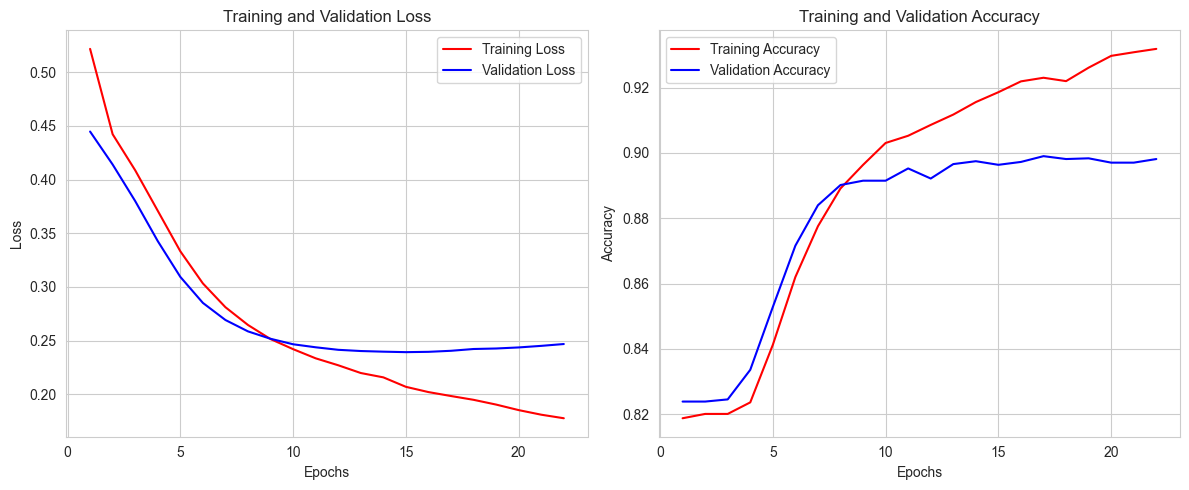

In [971]:
import matplotlib.pyplot as plt

history_dict = hist.history

# Extract loss and accuracy values
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Model Evaluation

In [972]:
Tokenized_test = tokenizer.texts_to_sequences(X_test)

Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

loss, accuracy = model.evaluate(Padded_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


142/142 [==============================] - 0s 470us/step - loss: 0.2649 - accuracy: 0.8913
Test Loss: 0.2649
Test Accuracy: 0.8913


In [973]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(Padded_test) > 0.5).astype("int32")

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculating Precision, Recall, F1-Score, and Support
report = classification_report(y_test, y_pred, target_names=['Not Recommended', 'Recommended'])

print(cm)
print(report)


142/142 [==============================] - 0s 411us/step
[[ 529  333]
 [ 159 3505]]
                 precision    recall  f1-score   support

Not Recommended       0.77      0.61      0.68       862
    Recommended       0.91      0.96      0.93      3664

       accuracy                           0.89      4526
      macro avg       0.84      0.79      0.81      4526
   weighted avg       0.89      0.89      0.89      4526



The model performs better in classifying Recommended reviews compared to Not Recommended ones, which can be seen from the higher recall and precision for the Recommended class. This is likely due to the fact the dataset is imbalanced with more Recommended reviews than Not Recommended ones. I am happy to proceed to testing on a sample of real world data previously unseen by the model.

In [974]:
def predict_sentiment(reviews, model, tokenizer, maxlen=50):
    """
    Predicts the sentiment of given reviews.

    Parameters:
    - reviews (list): List of reviews to predict sentiment for.
    - model (keras Model): The trained sentiment analysis model.
    - tokenizer (Tokenizer): The tokenizer used for preprocessing.
    - maxlen (int): Maximum length for padding. Default is 50.

    Returns:
    - list: List of predicted sentiments ('Recommended' or 'Not Recommended').
    """
    
    reviews_tokenized = tokenizer.texts_to_sequences(reviews)
    reviews_padded = pad_sequences(reviews_tokenized, maxlen=maxlen, padding='pre')
    
    predictions = model.predict(reviews_padded)
    
    # Convert predictions to 'Recommended' or 'Not Recommended' based on threshold (0.5 in this case)
    predicted_labels = ['Recommended' if pred >= 0.5 else 'Not Recommended' for pred in predictions]
    
    return predicted_labels



In [975]:
# Testing on Real World Example Reviews

test_reviews = ["Love it! Comfy and warm.", 
                   "This product is not worth the price.", 
                   "Bought a first pair but found the shoes too tight, so returned them for the wide fit shoes and they were even tighter than the first pair",
                   "I am pleased with the coat, fits true to size and it has a cozy lining",
                   "They are comfortable jeans although personally I think they're overpriced but I would buy again"]

predicted_results = predict_sentiment(test_reviews, model, tokenizer)
for review, label in zip(test_reviews, predicted_results):
    print(f"Review: {review}\nPredicted Sentiment: {label}\n")

1/1 [==============================] - 0s 11ms/step
Review: Love it! Comfy and warm.
Predicted Sentiment: Recommended

Review: This product is not worth the price.
Predicted Sentiment: Not Recommended

Review: Bought a first pair but found the shoes too tight, so returned them for the wide fit shoes and they were even tighter than the first pair
Predicted Sentiment: Not Recommended

Review: I am pleased with the coat, fits true to size and it has a cozy lining
Predicted Sentiment: Recommended

Review: They are comfortable jeans although personally I think they're overpriced but I would buy again
Predicted Sentiment: Recommended

